In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving drug200.csv to drug200.csv


{'drug200.csv': b'Age,Sex,BP,Cholesterol,Na_to_K,Drug\n23,F,HIGH,HIGH,25.355,drugY\n47,M,LOW,HIGH,13.093,drugC\n47,M,LOW,HIGH,10.114,drugC\n28,F,NORMAL,HIGH,7.798,drugX\n61,F,LOW,HIGH,18.043,drugY\n22,F,NORMAL,HIGH,8.607,drugX\n49,F,NORMAL,HIGH,16.275,drugY\n41,M,LOW,HIGH,11.037,drugC\n60,M,NORMAL,HIGH,15.171,drugY\n43,M,LOW,NORMAL,19.368,drugY\n47,F,LOW,HIGH,11.767,drugC\n34,F,HIGH,NORMAL,19.199,drugY\n43,M,LOW,HIGH,15.376,drugY\n74,F,LOW,HIGH,20.942,drugY\n50,F,NORMAL,HIGH,12.703,drugX\n16,F,HIGH,NORMAL,15.516,drugY\n69,M,LOW,NORMAL,11.455,drugX\n43,M,HIGH,HIGH,13.972,drugA\n23,M,LOW,HIGH,7.298,drugC\n32,F,HIGH,NORMAL,25.974,drugY\n57,M,LOW,NORMAL,19.128,drugY\n63,M,NORMAL,HIGH,25.917,drugY\n47,M,LOW,NORMAL,30.568,drugY\n48,F,LOW,HIGH,15.036,drugY\n33,F,LOW,HIGH,33.486,drugY\n28,F,HIGH,NORMAL,18.809,drugY\n31,M,HIGH,HIGH,30.366,drugY\n49,F,NORMAL,NORMAL,9.381,drugX\n39,F,LOW,NORMAL,22.697,drugY\n45,M,LOW,HIGH,17.951,drugY\n18,F,NORMAL,NORMAL,8.75,drugX\n74,M,HIGH,HIGH,9.567,drugB\n49

In [ ]:
df=pd.read_csv("drug200.csv")

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

In [ ]:
#here we dont include the target variable that we want to predict

X=np.asanyarray(df[['Age','Sex','BP','Cholesterol','Na_to_K']])
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [ ]:
# some features in this dataset are categorical, such as Sex or BP.
# Unfortunately, Sklearn Decision Trees does not handle categorical variables.
# We can still convert these features to numerical values using LabelEncoder to convert the categorical variable into numerical variables.

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()

# The fit method is used to fit the label encoder on the provided list of unique categories for each categorical variable.
# This step essentially prepares the label encoder to map each category to a unique numerical value.

le_sex.fit(['F','M'])

# The transform method is then used to transform the original categorical variable in the dataset
# into numerical representations based on the mapping learned during the fit step.
#X[:,1] - : indicates the starting 0 index and the ending index, 1 indicates the column(in this case 2nd column)
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
y=df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print("Training set: ",X_train.shape,y_train.shape)
print("testing set: ",X_test.shape,y_test.shape)

Training set:  (140, 5) (140,)
testing set:  (60, 5) (60,)


In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
pred=dtree.predict(X_test)

In [ ]:
print (pred [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))

DecisionTrees's Accuracy:  0.9833333333333333


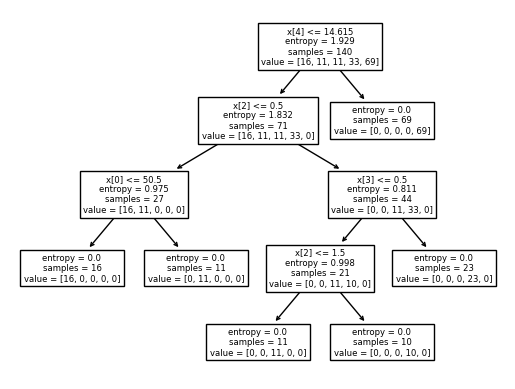

In [ ]:
tree.plot_tree(dtree)
plt.show()

In [ ]:
#looping for different max_depth values to check for accuracy

max_depth_values=[2,3,4,5,6,7,8,9,10]

for max_depth in max_depth_values:

  dtree1=DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  dtree1.fit(X_train,y_train)
  pred1=dtree1.predict(X_test)
  print(f"DecisionTrees's Accuracy with depth = {max_depth} is : ", metrics.accuracy_score(y_test, pred1))



DecisionTrees's Accuracy with depth = 2 is :  0.8166666666666667
DecisionTrees's Accuracy with depth = 3 is :  0.8166666666666667
DecisionTrees's Accuracy with depth = 4 is :  0.9833333333333333
DecisionTrees's Accuracy with depth = 5 is :  0.9833333333333333
DecisionTrees's Accuracy with depth = 6 is :  0.9833333333333333
DecisionTrees's Accuracy with depth = 7 is :  0.9833333333333333
DecisionTrees's Accuracy with depth = 8 is :  0.9833333333333333
DecisionTrees's Accuracy with depth = 9 is :  0.9833333333333333
DecisionTrees's Accuracy with depth = 10 is :  0.9833333333333333


In [ ]:
import pickle
Pkl_Filename = "model_tree.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(dtree, file)

In [ ]:
Age	Sex	BP	Cholesterol	Na_to_K	Drug

In [ ]:
from pydantic import BaseModel

class Patient(BaseModel):
    Age: int
    Sex: int
    BP: int
    Cholesterol: int
    Na_to_K: float
    class Config:
        schema_extra = {
            "example": {
                "Age": 23,
                "Sex": 0,
                "BP": 0,
                "Cholesterol": 0,
                "Na_to_K": 25.355,
            }
        }

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [ ]:
!pip install fastapi uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI


app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_tree.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_music_category(data: Patient):
    received = data.dict()
    Age = received['Age']
    Sex = received['Sex']
    BP = received['BP']
    Cholesterol = received['Cholesterol']
    Na_to_K = received['Na_to_K']
    pred_name = model.predict([[Age, Sex, BP,
                                Cholesterol, Na_to_K]]).tolist()[0]
    return {'prediction': pred_name}

<ipython-input-21-dc3a8d0055cf>:6: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")


In [ ]:
!pip install colabcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 10.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of nbclassic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9

In [ ]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
ngrok_token="2fV9bIcNGF2UXyq62UOTDwkR3XB_56Pp5JfT4Ef3sjPff1LHG"

In [ ]:
!pip install pyngrok

In [ ]:
import getpass

from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Open a TCP ngrok tunnel to the SSH server
connection_string = ngrok.connect("22", "tcp").public_url

ssh_url, port = connection_string.strip("tcp://").split(":")
print(f" * ngrok tunnel available, access with `ssh root@{ssh_url} -p{port}`")

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel available, access with `ssh root@0.tcp.ngrok.io -p17940`


In [ ]:
ColabCode().set_auth_token(ngrok_token)

Code Server can be accessed on: NgrokTunnel: "https://af46-130-211-248-205.ngrok-free.app" -> "http://localhost:10000"
[2024-04-23T16:50:16.744Z] info  code-server 3.10.2 387b12ef4ca404ffd39d84834e1f0776e9e3c005
[2024-04-23T16:50:16.745Z] info  Using user-data-dir ~/.local/share/code-server
[2024-04-23T16:50:16.760Z] info  Using config file ~/.config/code-server/config.yaml
[2024-04-23T16:50:16.760Z] info  HTTP server listening on http://127.0.0.1:10000 
[2024-04-23T16:50:16.760Z] info    - Authentication is disabled 
[2024-04-23T16:50:16.760Z] info    - Not serving HTTPS 


KeyboardInterrupt: 

In [ ]:
server.run_app(app=app)

Public URL: NgrokTunnel: "https://b16f-130-211-248-205.ngrok-free.app" -> "http://localhost:10000"


INFO:     Started server process [4249]
INFO:uvicorn.error:Started server process [4249]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     182.66.218.118:0 - "GET / HTTP/1.1" 200 OK
INFO:     182.66.218.118:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     182.66.218.118:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     182.66.218.118:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     182.66.218.118:0 - "POST /predict HTTP/1.1" 200 OK
